# Exploratory Data Analysis

[data source](http://www.datafountain.cn/#/competitions/247/data-intro) 

### JData_User

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ggplot import *
%matplotlib inline

In [6]:
path = 'D:/jdata/'
os.chdir(path)

In [67]:
user_data = pd.read_csv('JData_User.csv', sep=',' , encoding='latin-1')
print(user_data.shape)
print(user_data.head(5))
user_data['user_id'] = user_data['user_id'].astype('category')
user_data['age'] = user_data['age'].astype('category')
user_data['sex'] = user_data['sex'].astype('category')
user_data['user_lv_cd'] = user_data['user_lv_cd'].astype('category')
user_data["user_reg_dt"] = pd.to_datetime(user_data["user_reg_dt"])
print(user_data.describe())
print(user_data.age.unique())

(103616, 5)
   user_id    age  sex  user_lv_cd user_reg_dt
0       54     -1    2           1   1/26/2016
1       79  36-45    2           2   1/27/2016
2      100  16-25    2           3   1/27/2016
3      266     15    2           2   1/29/2016
4      333     -1    2           4   1/30/2016
         user_id     age       sex  user_lv_cd          user_reg_dt
count   103616.0  103616  103616.0    103616.0               103616
unique  103616.0       7       3.0         5.0                 3512
top     103616.0   26-35       2.0         5.0  2015-11-11 00:00:00
freq         1.0   46525   50484.0     39875.0                  383
first        NaN     NaN       NaN         NaN  2003-06-12 00:00:00
last         NaN     NaN       NaN         NaN  2016-11-29 00:00:00
[-1, 36-45, 16-25, 15, 26-35, 46-55, 56]
Categories (7, object): [-1, 36-45, 16-25, 15, 26-35, 46-55, 56]


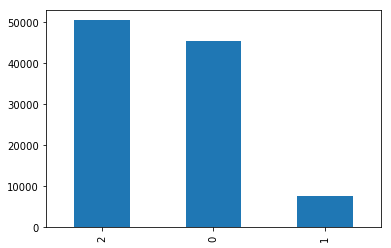

In [68]:
user_data.sex.value_counts().plot(kind='bar')

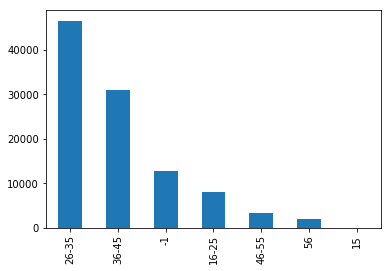

In [69]:
user_data.age.value_counts().plot(kind='bar')

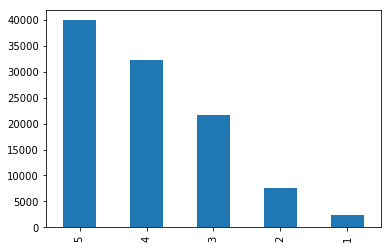

In [70]:
user_data.user_lv_cd.value_counts().plot(kind='bar')

In [99]:
date_count = pd.DataFrame(user_data.groupby('user_reg_dt')['user_id'].nunique())
print(date_count.shape)
print(date_count.head(5))

(3512, 1)
             user_id
user_reg_dt         
2003-06-12         1
2003-06-13         1
2003-06-16         1
2003-06-24         1
2003-08-11         1


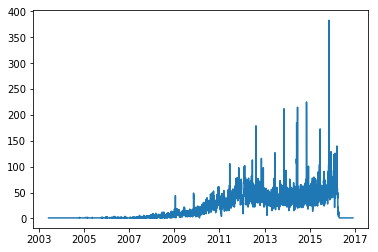

In [92]:
plt.plot(date_count)

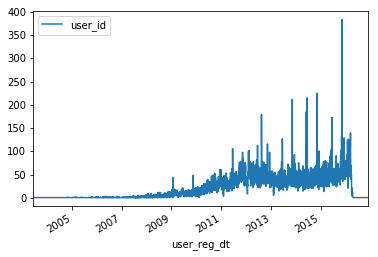

In [100]:
plt.figure(); date_count.plot(); plt.legend(loc='best')

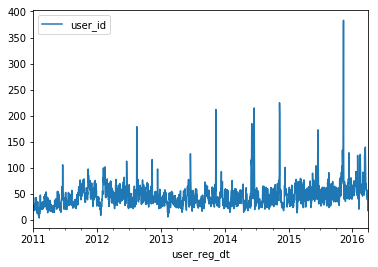

In [117]:
date_count['2011':'2016-03'].plot()

C:\Users\WangE\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


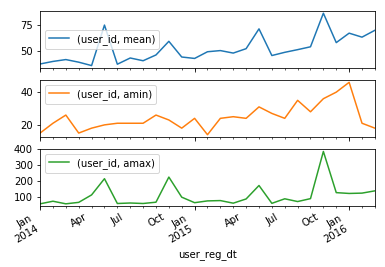

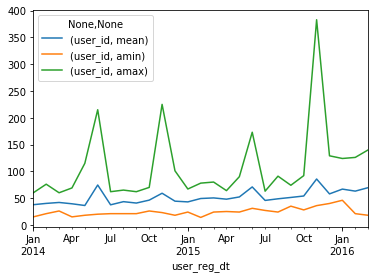

In [116]:
dc_mm = date_count.resample('M', how=['mean', np.min, np.max])
dc_mm['2014':'2016-03'].plot(subplots=True)
dc_mm['2014':'2016-03'].plot()